Configurações

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dados fornecidos
dados = {
    'T': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8'],
    'Temperatura': [10, 8, 6, 5, 20, 22, 23, 18],
    'Umidade': [20, 13, 15, 11, 26, 26, 27, 23],
    'Flor': [1, 0, 1, 1, 0, 0, 1, 0]
}

# Coordenadas dos centroides
c1 = np.array([5, 10])
c2 = np.array([25, 20])
centroides_iniciais = np.array([c1, c2])
print("centroides iniciais")
print(centroides_iniciais)

centroides iniciais
[[ 5 10]
 [25 20]]


Treina e calcula as centroides

In [42]:
# Criar uma matriz de características apenas com 'Temperatura' e 'Umidade'
X = np.array(list(zip(dados['Temperatura'], dados['Umidade'])))

# Inicializar o modelo K-Means com 2 clusters e os centroides iniciais
kmeans = KMeans(n_clusters=2, init=centroides_iniciais, n_init=1)

# Treinar o modelo
kmeans.fit(X)

# Obter as centroides finais
centroides_finais = kmeans.cluster_centers_

# Atribuir cada ponto ao cluster mais próximo
clusters = kmeans.labels_
print("centroides finais")
print(centroides_finais)

centroides finais
[[ 7.25 14.75]
 [20.75 25.5 ]]


Exibe o plano

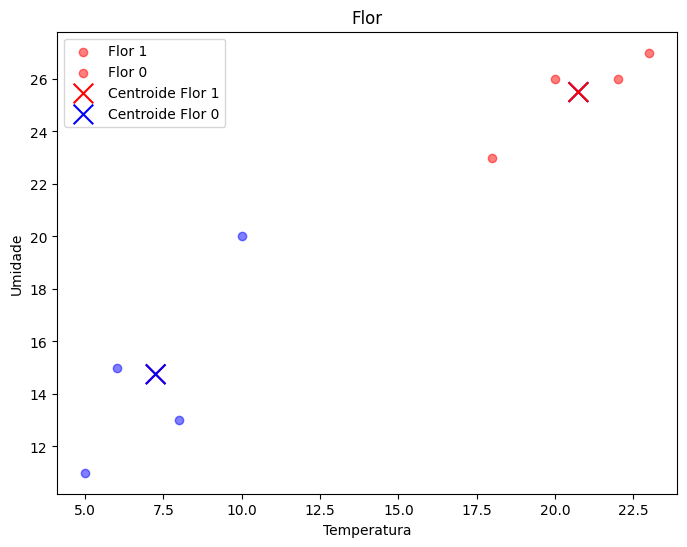

In [46]:
# Plotar os resultados
plt.figure(figsize=(8, 6))

# Adicionar pontos de treino ao gráfico
for i, ponto in enumerate(dados['T']):
    cor = 'red' if clusters[i] == 1 else 'blue'
    label = 'Flor 1' if dados['Flor'][i] == 1 else 'Flor 0'
    plt.scatter(dados['Temperatura'][i], dados['Umidade'][i], c=cor, marker='o', label=label, alpha=0.5)

# Adicionar as centroides finais ao gráfico com legendas nomeadas
plt.scatter(centroides_finais[:, 0], centroides_finais[:, 1], c=['red', 'blue'], marker='x', s=200, label='Centroide Flor 1')
plt.scatter(centroides_finais[:, 0], centroides_finais[:, 1], c=['blue', 'red'], marker='x', s=200, label='Centroide Flor 0')

# Adicionar apenas duas legendas
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.title('Flor')
plt.show()